In [112]:
# This program predicts stock price by using machine learning models 


# TO better use this program for other stock 
* Change the name of the stock in row [13] under df = quandl.get('Wiki/fb')
* check which model has higher confidence and use it 
* change the forecast_out for the number of future prediction days 

In [181]:
# Install the dependicies 

import quandl ,math
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns



In [218]:
# get the stock data 
# df = quandl.get('Wiki/amzn')
df=pd.read_csv('AMZN-2.csv')

# Take a look at the data
print(df.head(3))


         Date         Open         High          Low        Close  \
0  2018-03-27  1572.400024  1575.969971  1482.319946  1497.050049   
1  2018-03-28  1447.000000  1455.900024  1386.170044  1431.420044   
2  2018-03-29  1406.000000  1455.469971  1365.199951  1447.339966   

     Adj Close    Volume  
0  1497.050049   6999600  
1  1431.420044  13705300  
2  1447.339966  12581100  


In [219]:
# Take a look at the data information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 7 columns):
Date         423 non-null object
Open         423 non-null float64
High         423 non-null float64
Low          423 non-null float64
Close        423 non-null float64
Adj Close    423 non-null float64
Volume       423 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 23.3+ KB
None


In [220]:
# Get the Adjusted close price 

df=df[['Adj Close']]

# Take a look at the new data 
print(df.head(3))

     Adj Close
0  1497.050049
1  1431.420044
2  1447.339966


In [221]:
# create a variable to predict the future stock price and for how many days
# A variable for predicting 'n' days out into the future
# predicting 10 prcent 
forecast_out = int(math.ceil(0.015*len(df)))

# Create another columns for (the dependent variable )shifted 'n' units up 
# I used the -1 to shift the columns up (moved up the value on day up )
df['prediction']= df[['Adj Close']].shift(-1)

# print the new columns 
print(df.tail(5))
# In the line below it shows that the last day on prediction coulmns are empty since we 
# don't know yet and this is what will work on 

       Adj Close   prediction
418  1734.709961  1745.719971
419  1745.719971  1773.839966
420  1773.839966  1796.939941
421  1796.939941  1818.510010
422  1818.510010          NaN


In [222]:
# To make it more clear if i change the shift value to (2) that mean we shifted two days 
df['prediction']= df[['Adj Close']].shift(-2)
print(df.tail(5))




       Adj Close   prediction
418  1734.709961  1773.839966
419  1745.719971  1796.939941
420  1773.839966  1818.510010
421  1796.939941          NaN
422  1818.510010          NaN


In [223]:
# now I will put the forecast variable which is the number of the days we want 
# I will put the forecast variable in the shift function 
df['prediction']= df[['Adj Close']].shift(-forecast_out)
print(df.tail(5))

       Adj Close  prediction
418  1734.709961         NaN
419  1745.719971         NaN
420  1773.839966         NaN
421  1796.939941         NaN
422  1818.510010         NaN


In [224]:
# create the independent data set and will call it x 
# convert the data frame to numpy array 
x = np.array(df.drop(['prediction'],1))

# Remove the last (n |forecast_out|) rows
x= x[:-forecast_out]

# print x 
print(x)

[[1497.050049]
 [1431.420044]
 [1447.339966]
 [1371.98999 ]
 [1392.050049]
 [1410.569946]
 [1451.75    ]
 [1405.22998 ]
 [1406.079956]
 [1436.219971]
 [1427.050049]
 [1448.5     ]
 [1430.790039]
 [1441.5     ]
 [1503.829956]
 [1527.839966]
 [1556.910034]
 [1527.48999 ]
 [1517.859985]
 [1460.089966]
 [1460.170044]
 [1517.959961]
 [1572.619995]
 [1566.130005]
 [1582.26001 ]
 [1569.680054]
 [1572.079956]
 [1580.949951]
 [1600.140015]
 [1592.390015]
 [1608.      ]
 [1609.079956]
 [1602.910034]
 [1601.540039]
 [1576.119995]
 [1587.280029]
 [1581.76001 ]
 [1574.369995]
 [1585.459961]
 [1581.400024]
 [1601.859985]
 [1603.069946]
 [1610.150024]
 [1612.869995]
 [1624.890015]
 [1629.619995]
 [1641.540039]
 [1665.27002 ]
 [1696.349976]
 [1695.75    ]
 [1689.300049]
 [1683.98999 ]
 [1689.119995]
 [1698.75    ]
 [1704.859985]
 [1723.859985]
 [1715.969971]
 [1723.790039]
 [1734.780029]
 [1750.079956]
 [1730.219971]
 [1715.670044]
 [1663.150024]
 [1691.089966]
 [1660.51001 ]
 [1701.449951]
 [1699.800

In [225]:
# create the indipendent data and will call it y 
# convert the data frame to a numpy array (all the value including Nan's)

y = np.array(df['prediction'])

# get all the y value except (n) rows 
y = y[:-forecast_out]

# print(y)

In [226]:
# Split the data to 80% traing and 20% testing 
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.2)

In [227]:
# create and train the model using the support victor machine (regressor/ classifier),supervised learning

svr_rbf = SVR(kernel='rbf',C=1e3,gamma=0.1)

svr_rbf.fit(x_train,y_train)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [228]:
# Testing model = Score returns the coeifecient of determination R^2 of the prediction 
# The best score is 1.0
svm_confidence = svr_rbf.score(x_test,y_test) 

print("The accuracy or confidence {}".format(svm_confidence))

The accuracy or confidence 0.553822313227196


# Try another model 

In [229]:
# create and train the linear rigression model 

lr= LinearRegression()

# train the model 
lr.fit (x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
# Testing model = Score returns the coeifecient of determination R^2 of the prediction 
# The best score is 1.0
lr_confidence = lr.score(x_test,y_test) 

print("The accuracy or confidence {}".format(lr_confidence))



The accuracy or confidence 0.7681931566382953


In [231]:
# set x_forecast = to the last 30 rows of the orginal data set from the Adj close columns 
x_forecast = np.array(df.drop(['prediction'],1))[-forecast_out:]
print(x_forecast)

[[1752.790039]
 [1745.530029]
 [1734.709961]
 [1745.719971]
 [1773.839966]
 [1796.939941]
 [1818.51001 ]]


In [232]:
# prediction for the linear regression 
# print the prediction for the next 'n' days 
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[1757.56403581 1751.69265084 1742.94214159 1751.84626256 1774.58773483
 1793.26936834 1810.71372158]


In [233]:
# prediction for the SVR regression 
# print the prediction for the next 'n' days 
sv_prediction = svr_rbf.predict(x_forecast)
print(sv_prediction)

[1819.05593847 1769.83836128 1701.93550085 1758.87410806 1814.31134607
 1829.10691324 1807.43391721]


In [234]:
real_price=np.array(close)

''

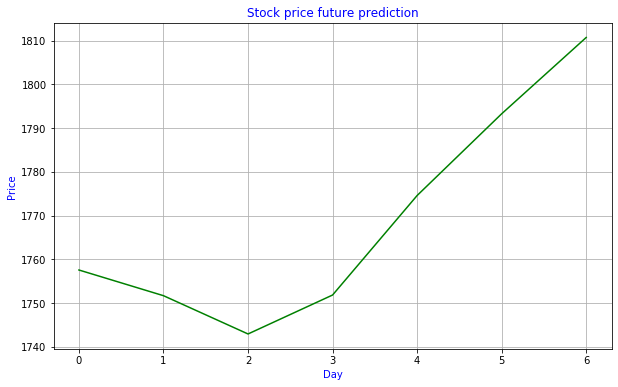

In [235]:
plt.figure(figsize=(10,6))
plt.plot(lr_prediction,color='green')
plt.grid()
plt.xlabel('Day',color='blue')
plt.ylabel('Price',color='blue')
plt.title('Stock price future prediction',color='blue')
;